<a href="https://colab.research.google.com/github/miklaszewskigrzegorz/dw_matrix/blob/master/matrix_one/day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

najpierw klikamy Unmonunt Drive żeby połączyć z My Drive


In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score


In [116]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [117]:
df = pd.read_csv('data/men_shoes.csv', low_memory=False)
df.shape

(18280, 48)

In [118]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [119]:
mean_price = np.mean(df['prices_amountmin'])
mean_price

93.53952188183217

In [120]:
[3]*5

[3, 3, 3, 3, 3]

In [121]:
y_true = df['prices_amountmin'] # wartość prawidłowa do prognozwania mamy 18 tysiecy
#y_true.shape[0]
# teraz powtarzamy mean_price * każdy wierwsz >18000 żeby wyliczyć y_pred
# y_pred wartość którą chcemy zprognozować
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true,y_pred)


63.968341227870624

żeby znormalizować - trzeba zlogarytmować

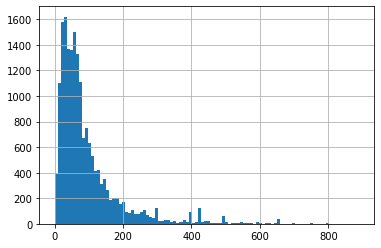

In [122]:
y_true = df['prices_amountmin'].hist(bins=100)

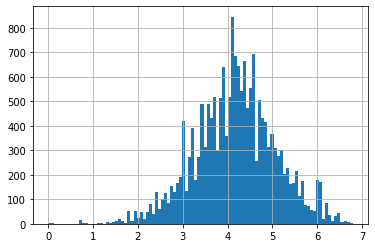

In [20]:
np.log1p(df['prices_amountmax']).hist(bins=100)
# np.log( df[prices_amountmin'] +1).hist(bins=100)
# bo np.log(0)  minus nieskończoność
# np.log(0+1) wynosi 0 
# funkcja np.log1p robi to samo

drugi eksperyment - zamiast średniej będzie Mediana

In [123]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true,y_pred)

58.01120240700219

In [124]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1(np.mean(np.log1p(y_true)))
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true,y_pred)

58.03539547661041

In [125]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [126]:
df.brand.value_counts()

Nike              1709
PUMA               574
Ralph Lauren       524
New Balance        361
VANS               356
                  ... 
Browning             1
Venum                1
Great Northern       1
HUDSON               1
Silver Lilly         1
Name: brand, Length: 1856, dtype: int64

In [26]:
df['brand'].factorize()   #faktoryzacja - dostajmy numer dla każdego unikata

(array([  0,   0,   1, ..., 411, 411, 411]),
 Index(['Josmo', 'SERVUS BY HONEYWELL', 'NATIVE', 'MAUI AND SONS', 'Twisted X',
        'Lacoste', 'Rubies', 'unbranded', 'PUMA', 'Filament',
        ...
        'Bindi', 'Holloway Sportswear', 'River City', 'AH by Android Homme',
        'SEG', 'American Rag', 'BININBOX', 'HEAD', 'Swix', 'Xray, XRay'],
       dtype='object', length=1856))

In [0]:
df['brand_cat'] = df['brand'].factorize()[0] 

In [128]:
feats = ['brand_cat']
X = df[ feats ].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [129]:
import sklearn
sklearn.metrics.SCORERS.keys()


dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [0]:
def run_model(feats):
  X = df[ feats ].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)
  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return  np.mean(scores), np.std(scores)

In [131]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

nowa cecha df.manufacture.value_counts() + colors df.color.value_counts()

In [132]:
df.manufacturer.value_counts()

Puma              476
Nike              374
New Balance       249
VANS              170
Reebok            128
                 ... 
Ranger              1
A. Testoni          1
SANUK               1
Sorel Footwear      1
Silver Lilly        1
Name: manufacturer, Length: 618, dtype: int64

In [133]:
df['manufacturer'].factorize()

(array([-1, -1, -1, ..., -1, -1, -1]),
 Index(['Maui And Sons', 'Twisted X', 'Puma', 'Filament', 'Robert Wayne',
        'Roper', 'Puentes Denver', 'Elan Polo', 'SoftScience', 'Dr. Martens',
        ...
        'MF Western', 'Luxottica', 'Minav Corp.', 'Rainbow Sandals',
        'Muck Boots', 'AH by Android Homme', 'Rubies Costume Co', 'Vasque',
        'POLO Ralph Lauren', 'HEAD'],
       dtype='object', length=618))

In [0]:
df['manufacturer_cat'] = df['manufacturer'].factorize()[0] 

In [135]:
df.colors.value_counts()

Black                                          1364
Brown                                           746
Blue                                            421
Multicolor                                      415
White                                           252
                                               ... 
PhantomWhiteGum Yellow                            1
Flash CoralBlack,WhiteMethyl BlueDark Slate       1
Neutral GreyRed-Obsidian                          1
English Blue                                      1
Bull Fight Tan                                    1
Name: colors, Length: 2080, dtype: int64

In [136]:
df['colors'].factorize()

(array([-1, -1, -1, ..., -1, -1, -1]),
 Index(['Red,Black,Sketchy Slant,Yellow,BlackBlue,BlackRed,Sharky Tribe,Pro Ocean,BlackBlueYellow,Gray,Helms,BlackGreenYellow,Blue,Green,Black-White,Black Multi,GrayBlack',
        'Dark Grey',
        'White,Yellow,Red,Purple,Black,Pink,Orange,Green,Brown,Blue,Grey',
        'Beige', 'Black', 'Tan Navy', 'White', 'Multicolor', 'Orange',
        'Field Tan Canvas,Brush Brown Canvas',
        ...
        'Sports', 'white  Brown', 'A Berr,N N,Berry',
        'VoltPhoto BlueHyper Pink',
        'WhiteGrayYellow,RedNeon Yellow,Red,BlueWhite',
        'BlackMetallic SilverLaser CrimsonGrey', 'Tumbled Tomboni Brown',
        'Mahogany  Mahogany',
        'TangerineBlackGriffin,Griffin,AquaBlackGriffin,BlackBlackWhite,GriffinBlackWhite',
        'Bay Brown'],
       dtype='object', length=2080))

In [0]:
df['colors_cat'] = df['colors'].factorize()[0] 

In [138]:
run_model(['brand_cat','manufacturer_cat','colors_cat'])

(-61.76723637561056, 5.743222840525925)

In [0]:
!git add matrix_one/day4.ipynb

In [0]:
!git config --global user.email "miklaszewskigrzegorz@gmail.com"
!git config --global user.name "Grzegorz"

In [144]:
!git commit -m "day4 - Read Men's Shoe Prices dataset from data.world"

[master 83d4f24] day4 - Read Men's Shoe Prices dataset from data.world
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite matrix_one/day4.ipynb (94%)


In [145]:
!git status 

On branch master
Your branch is ahead of 'origin/master' by 11 commits.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   matrix_one/day4.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [156]:
cd ..

/content/drive/My Drive/Colab Notebooks/dw_matrix
